In [1]:
import pandas as pd
import configparser
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
inifile = configparser.ConfigParser()
inifile.read('../config.ini')
df_wine = pd.read_csv(
    inifile.get('url', 'wine'), header=None)
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [2]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [3]:
lda = LDA(n_components=2)

In [4]:
X_train_lda = lda.fit_transform(X_train_std, y_train)

In [5]:
from sklearn.linear_model import LogisticRegression

In [6]:
lr = LogisticRegression()

In [7]:
lr = lr.fit(X_train_lda, y_train)

In [8]:
from plot_decision_regions import plot_decision_regions

In [9]:
plot_decision_regions(X_train_lda, y_train, classifier=lr)

In [10]:
plt.xlabel('LD 1')

Text(0.5,0,'LD 1')

In [11]:
plt.ylabel('LD 2')

Text(0,0.5,'LD 2')

In [12]:
plt.legend(loc='lower left')

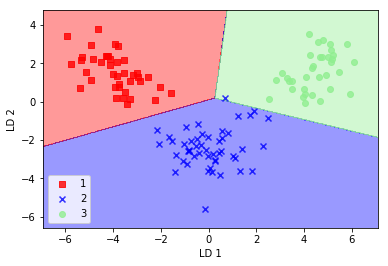

In [13]:
plt.show()

In [14]:
X_test_lda = lda.transform(X_test_std)

In [15]:
plot_decision_regions(X_test_lda, y_test, classifier=lr)

In [16]:
plt.xlabel('LD 1')

Text(0.5,0,'LD 1')

In [17]:
plt.ylabel('LD 2')

Text(0,0.5,'LD 2')

In [18]:
plt.legend(loc='lower left')

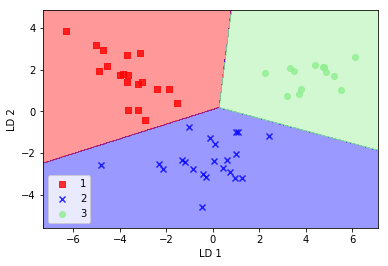

In [19]:
plt.show()